In [32]:
%tensorflow_version 2.x
from tensorflow.keras.datasets.fashion_mnist import load_data
load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [0]:
(x_train, y_train), (x_test, y_test) = load_data()

In [34]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [35]:
import pandas as pd
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,13,73,0,0,1,4,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,3,0,36,136,127,62,54,0,0,0,1,3,4,0,0,3
5,0,0,0,0,0,0,0,0,0,0,0,0,6,0,102,204,176,134,144,123,23,0,0,0,0,12,10,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,155,236,207,178,107,156,161,109,64,23,77,130,72,15
7,0,0,0,0,0,0,0,0,0,0,0,1,0,69,207,223,218,216,216,163,127,121,122,146,141,88,172,66
8,0,0,0,0,0,0,0,0,0,1,1,1,0,200,232,232,233,229,223,223,215,213,164,127,123,196,229,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,183,225,216,223,228,235,227,224,222,224,221,223,245,173,0


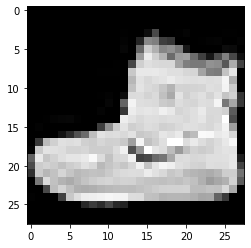

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[0], cmap="gray")


In [37]:
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
mlp = Sequential()
mlp.add(Dense(128, activation="relu", input_dim=784))
mlp.add(Dropout(0.25))
# 隨機丟掉神經元 dropout
mlp.add(Dense(10, activation="softmax"))
mlp.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:

# 最後一層個數
# 1:"binary_crossentropy" 2up:"categorical_crossentropy"
# 激活函數
# 1:"sigmoid" 2up:"softmax"
from tensorflow.keras.losses import CategoricalCrossentropy
mlp.compile(loss=CategoricalCrossentropy(),
            optimizer="adam",
            metrics=["accuracy"])

In [39]:
# mlp: 進去要1D, tensorflow: 輸入[-1, 1][0, 1]
x_train_norm = x_train.reshape(-1,784) /255
x_test_norm = x_test.reshape(-1,784) /255
pd.DataFrame(x_test_norm)
# pd.DataFrame(x_train_norm)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.050980,0.262745,0.000000,0.000000,0.000000,0.000000,0.196078,0.149020,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.031373,0.470588,0.819608,0.886275,0.968627,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.152941,0.976471,1.0,0.482353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.192157,0.803922,0.772549,0.043137,0.0,0.015686,0.003922,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.011765,0.0,0.011765,0.682353,0.741176,0.262745,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.003922,0.000000,0.262745,0.694118,0.505882,0.600000,0.458824,0.505882,0.572549,0.552941,0.686275,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.007843,0.000000,0.768627,1.000000,...,0.631373,1.000000,0.988235,0.466667,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.384314,0.623529,0.278431,0.000000,0.000000,0.266667,0.690196,0.643137,0.227451,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.082353,0.482353,0.423529,0.388235,0.388235,0.329412,0.325490,0.337255,0.360784,0.274510,0.023529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.415686,0.972549,0.901961,...,0.878431,0.972549,0.180392,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.078431,0.682353,0.396078,0.000000,0.000000,0.000000,0.572549,0.572549,0.003922,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.007843,0.0,0.003922,0.003922,0.0,0.000000,0.000000,0.000000,0.223529,0.262745,0.286275,0.298039,0.298039,0.325490,0.243137,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003922,0.003922,0.003922,0.0,0.000000,0.050980,0.309804,0.501961,0.788235,...,0.611765,0.682353,0.772549,0.713725,0.635294,0.239216,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.117647,0.282353,0.372549,0.427451,0.435294,0.435294,0.415686,0.396078,0.278431,0.047059,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [40]:
# 答案要做one-hot encoding
from tensorflow.keras.utils import  to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print(y_train[0], y_train_cat[0])

9 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [41]:
# batch_size: 問多少筆資料進行一次梯度下降(平均)
# epochs: 整份資料要看幾遍
# validation_split: train_test_split驗證模型到底好不好
# verbose: log level(0:沒有 1:最多 2:適中)
# 270: 54000(train) / 200
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
stop_callback = EarlyStopping(patience=3, restore_best_weights= True)
save_callback = ModelCheckpoint("fashion.h5", save_best_only=True)
mlp.fit(x_train_norm,
        y_train_cat,
        batch_size=200,
        epochs=100,
        validation_split=0.1,
        callbacks=[stop_callback, save_callback],
        verbose=2)

Epoch 1/100
270/270 - 2s - loss: 0.6774 - accuracy: 0.7671 - val_loss: 0.4554 - val_accuracy: 0.8400
Epoch 2/100
270/270 - 1s - loss: 0.4590 - accuracy: 0.8396 - val_loss: 0.4021 - val_accuracy: 0.8560
Epoch 3/100
270/270 - 1s - loss: 0.4085 - accuracy: 0.8572 - val_loss: 0.3826 - val_accuracy: 0.8592
Epoch 4/100
270/270 - 1s - loss: 0.3813 - accuracy: 0.8637 - val_loss: 0.3649 - val_accuracy: 0.8673
Epoch 5/100
270/270 - 1s - loss: 0.3649 - accuracy: 0.8704 - val_loss: 0.3541 - val_accuracy: 0.8740
Epoch 6/100
270/270 - 1s - loss: 0.3507 - accuracy: 0.8726 - val_loss: 0.3493 - val_accuracy: 0.8723
Epoch 7/100
270/270 - 1s - loss: 0.3344 - accuracy: 0.8786 - val_loss: 0.3334 - val_accuracy: 0.8788
Epoch 8/100
270/270 - 1s - loss: 0.3247 - accuracy: 0.8826 - val_loss: 0.3222 - val_accuracy: 0.8843
Epoch 9/100
270/270 - 1s - loss: 0.3183 - accuracy: 0.8854 - val_loss: 0.3250 - val_accuracy: 0.8820
Epoch 10/100
270/270 - 1s - loss: 0.3099 - accuracy: 0.8874 - val_loss: 0.3152 - val_accura

In [42]:
# predict: 機率 predict_classes: 類別
pre = mlp.predict_classes(x_test_norm)
pre

array([9, 2, 1, ..., 8, 1, 5])

In [43]:
mlp.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.3396 - accuracy: 0.8785


[0.33961278200149536, 0.8784999847412109]

In [44]:
import numpy as np
from sklearn.metrics import confusion_matrix
names = [
    "T-shirt",
 	"Trouser",
	"Pullover",
	"Dress",
	"Coat",
	"Sandal",
	"Shirt",
	"Sneaker",
	"Bag",
	"Ankle boot"
]
c = ["{}(預測)".format(i) for i in names]
i = ["{}(正確)".format(i) for i in names]
mat = confusion_matrix(y_test, pre)
mat = [np.round(row/sum(row), 3) for row in mat]
pd.DataFrame(mat, columns=c, index=i)

,T-shirt(預測),Trouser(預測),Pullover(預測),Dress(預測),Coat(預測),Sandal(預測),Shirt(預測),Sneaker(預測),Bag(預測),Ankle boot(預測)
T-shirt(正確),0.855,0.000,0.008,0.034,0.005,0.000,0.088,0.001,0.009,0.000
Trouser(正確),0.002,0.968,0.001,0.021,0.005,0.000,0.003,0.000,0.000,0.000
Pullover(正確),0.017,0.001,0.743,0.010,0.154,0.000,0.073,0.000,0.002,0.000
Dress(正確),0.022,0.005,0.010,0.897,0.035,0.000,0.027,0.000,0.004,0.000
Coat(正確),0.000,0.001,0.064,0.033,0.855,0.000,0.045,0.000,0.002,0.000
Sandal(正確),0.000,0.000,0.000,0.000,0.000,0.937,0.000,0.034,0.002,0.027
Shirt(正確),0.131,0.000,0.076,0.035,0.105,0.000,0.647,0.000,0.006,0.000
Sneaker(正確),0.000,0.000,0.000,0.000,0.000,0.012,0.000,0.946,0.000,0.042
Bag(正確),0.003,0.000,0.005,0.004,0.005,0.001,0.009,0.006,0.967,0.000
Ankle boot(正確),0.000,0.000,0.000,0.000,0.000,0.003,0.001,0.026,0.000,0.970


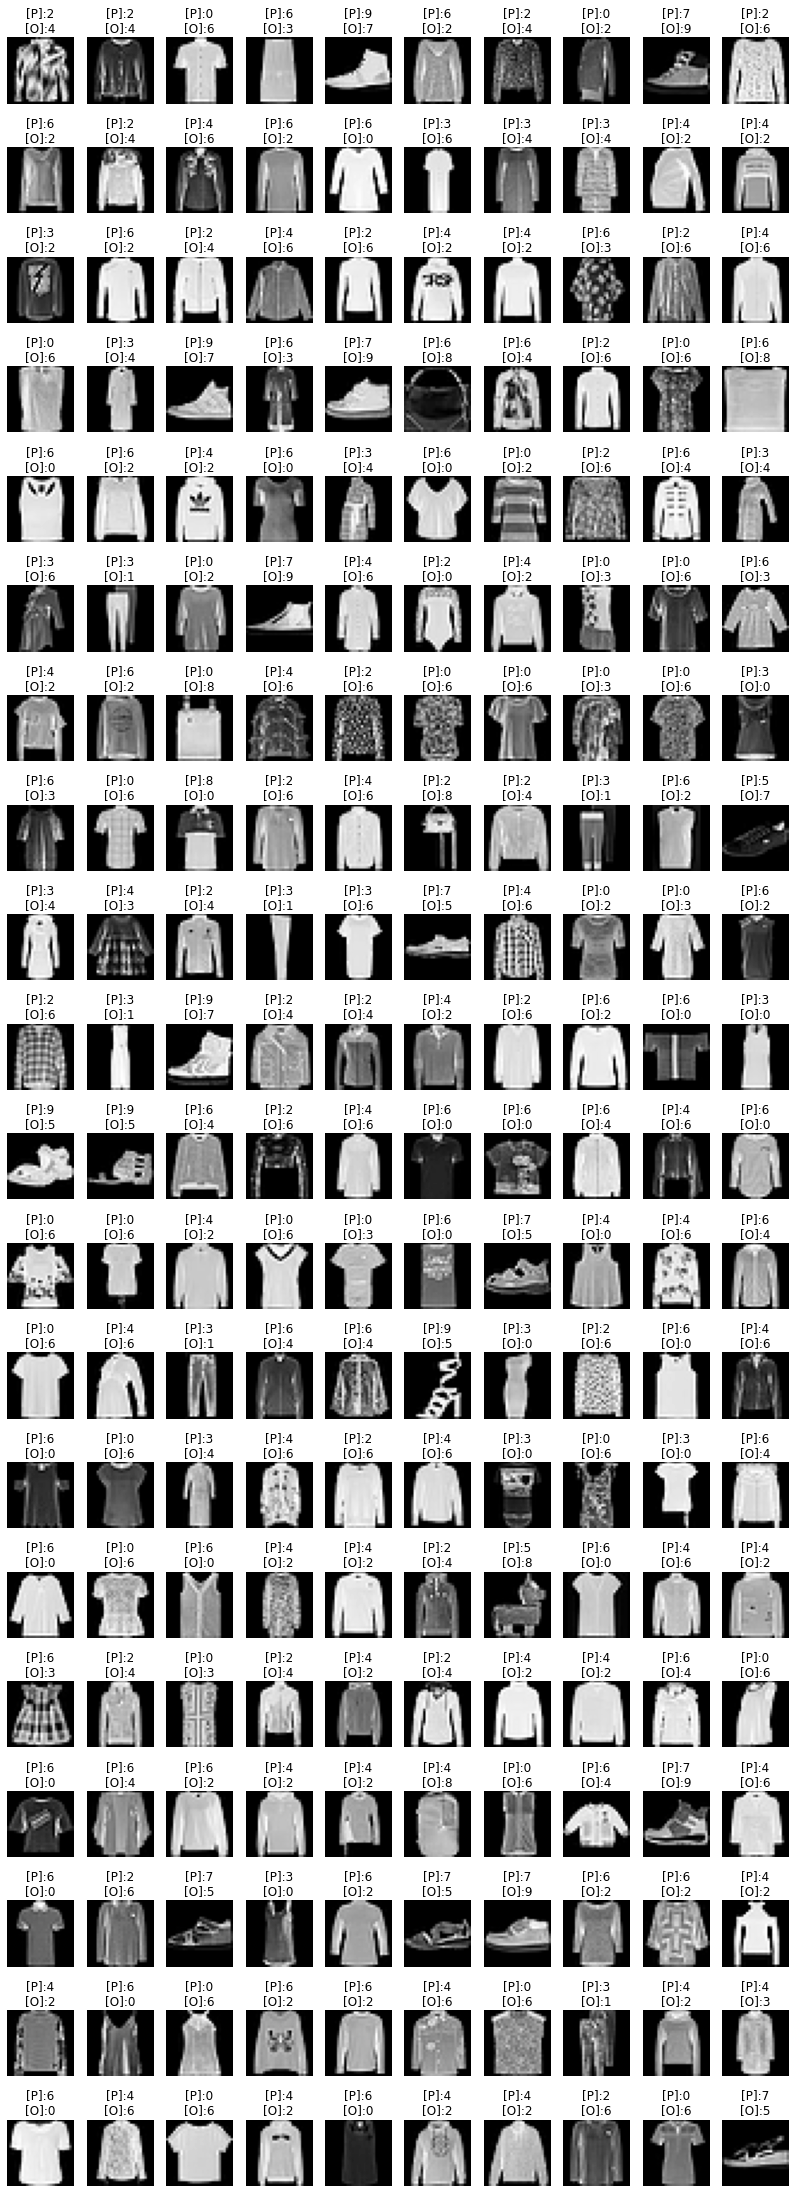

In [45]:
# [:200]: 太多錯, 我只取前兩百個
idx = np.nonzero(pre != y_test)[0][:200]
false_pre_img = x_test[idx]
false_pre_label = y_test[idx]
false_pre_predict = pre[idx]

width = 10
height = len(idx) // width + 1
plt.figure(figsize=(14, 42))
for i, img in enumerate(false_pre_img):
    plt.subplot(height, width, i+1)
    t = "[P]:{}\n[O]:{}".format(false_pre_predict[i],
                                false_pre_label[i])
    plt.title(t)
    plt.axis("off")
    plt.imshow(img, cmap="gray")

檔名:test.png
正確答案應該是: Bag


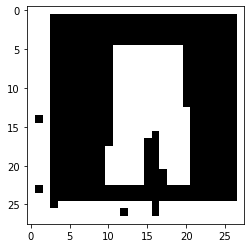

In [47]:
# 輸入檔案
from tensorflow.keras.preprocessing.image import load_img
f = input("檔名:")
img_raw = load_img(f, target_size=(28, 28)).convert("L")
img = np.array(img_raw).reshape(1, 784) / 255
answer = mlp.predict_classes(img)[0]
print("正確答案應該是:", names[answer])
plt.imshow(img_raw, cmap="gray")

In [0]:
#儲存模型 : mlp.save("mlp.h5")
# 如果你想看儲存的樣子: https://support.hdfgroup.org/products/java/release/download.html
#讀取
from tensorflow.keras.models import load_model
loaded = load_data("fashion.h5")
# 讀取完: fit, evaluate, predict, 不需要compile
loaded.evaluate(x_train_norm, y_test_cat)